In [1]:
#importing libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import numpy
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('punch_headlines_2020.csv')#read csv file into dataframe

In [3]:
df.head()

,Unnamed: 0,Headlines,Summary,Date
0,0,"Buhari receives Sambo, hails Niger Republic’s ...","Olalekan Adetayo, Abuja The President, Major G...","December 31st, 2020"
1,1,Over 50 countries launch Covid-19 vaccination ...,Over 50 countries around the world have alread...,"December 31st, 2020"
2,2,Ex-Man Utd boss Docherty dies a 92,Former Manchester United and Scotland manager ...,"December 31st, 2020"
3,3,Sanwo-Olu signs 2021 appropriation bill into law,"Sodiq Oyeleke Lagos State Governor, Babatunde ...","December 31st, 2020"
4,4,Kaduna demolishes ‘nude party’ building,"Godwin Isenyo, Kaduna Following the arrest of ...","December 31st, 2020"


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) #dropping column

In [5]:
df['Date'] = pd.to_datetime(df['Date']) #changing date column datatype into datetime for easier analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18138 entries, 0 to 18137
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Headlines  18138 non-null  object        
 1   Summary    18124 non-null  object        
 2   Date       18138 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 425.2+ KB


<function matplotlib.pyplot.show(*args, **kw)>

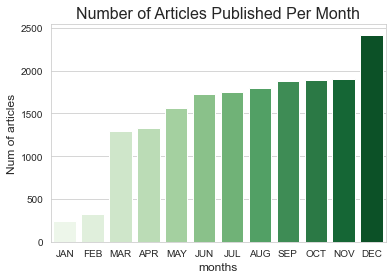

In [7]:
monthly_headlines = df.groupby(df['Date'].dt.month)['Headlines'].count()#series object grouping articles by month
#plotting on a barplot
sns.set_style('whitegrid')
x=monthly_headlines.index
y = monthly_headlines.values
sns.barplot(x=monthly_headlines.index, y = monthly_headlines.values, data = monthly_headlines, palette = 'Greens')
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'] #labeling ticks
tickvalues= range(0,len(x)) #setting tick values
plt.xticks(ticks=tickvalues, labels=months)
plt.xlabel('months', size = 12)
plt.ylabel('Num of articles', size = 12)
plt.title('Number of Articles Published Per Month', size = 16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

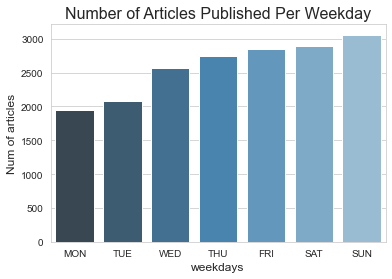

In [8]:
weekday_headlines = df.groupby(df['Date'].dt.weekday)['Headlines'].count()#series object grouping articles by weekdays
#plotting on barplot
sns.set_style('whitegrid')
x = weekday_headlines.index
y = weekday_headlines.values
sns.barplot(x=weekday_headlines.index, y = weekday_headlines.values, data = weekday_headlines, palette = 'Blues_d')
days = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
tickvalues= range(0,len(x))
plt.xticks(ticks=tickvalues, labels=days)
plt.xlabel('weekdays', size = 12)
plt.ylabel('Num of articles', size = 12)
plt.title('Number of Articles Published Per Weekday', size = 16)
plt.show

In [9]:
#checking value counts of articles posted by date
df['Date'].value_counts().head(10)

2020-01-08    113
2020-01-09    113
2020-01-17    112
2020-04-21    110
2020-02-07    103
2020-01-22    102
2020-01-13     98
2020-11-30     97
2020-02-10     97
2020-01-20     97
Name: Date, dtype: int64

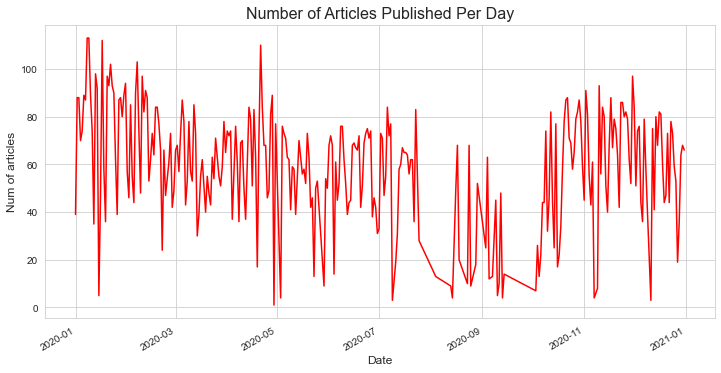

In [10]:
#plotting value counts of articles posted by date
ax = df['Date'].value_counts()
ax.plot(color='red', figsize=(12,6))
plt.xlabel('Date', size = 12)
plt.ylabel('Num of articles', size = 12)
plt.title('Number of Articles Published Per Day', size = 16)
plt.show()

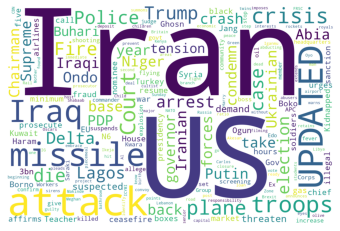

In [11]:
#creating wordcloud for day with more articles
text = " ".join([word for word in df['Headlines'][df.Date=='2020-01-08']])
stopwords = set(STOPWORDS)
stopwords.update(['say', 's', 'says', 'u', 'others', 'new', 'tell', 'two', 'three', 'seek'])
wordcloud = WordCloud(stopwords = stopwords, width=1500, height=1000, background_color='white', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

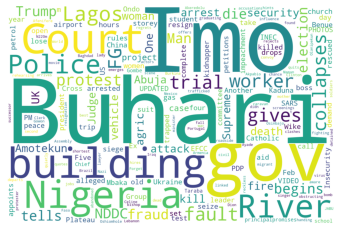

In [13]:
text = " ".join([word for word in df['Headlines'][df.Date=='2020-01-17']])
stopwords = set(STOPWORDS)
stopwords.update(['say', 's', 'says', 'u', 'others', 'new', 'tell', 'two', 'three', 'seek'])
wordcloud = WordCloud(stopwords = stopwords, width=1500, height=1000, background_color='white', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

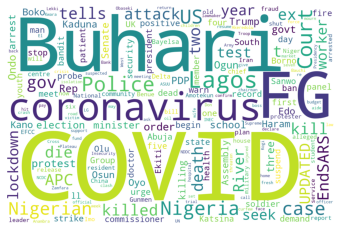

In [14]:
#creating word cloud of words in headlines
text = " ".join([word for word in df['Headlines']])
stopwords = set(STOPWORDS)#setting stopwords
stopwords.update(['say', 's', 'says', 'u', 'others', 'new', 'tell'])#updating stopwords
wordcloud = WordCloud(stopwords = stopwords, width=1500, height=1000, background_color='white', 
                      collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
#defining function to get subjectivity and polarity
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [16]:
#applying function
df['Subjectivity'] = df['Headlines'].apply(getSubjectivity)
df['Polarity'] = df['Headlines'].apply(getPolarity)
df.head()

,Headlines,Summary,Date,Subjectivity,Polarity
0,"Buhari receives Sambo, hails Niger Republic’s ...","Olalekan Adetayo, Abuja The President, Major G...",2020-12-31,0.5,0.25
1,Over 50 countries launch Covid-19 vaccination ...,Over 50 countries around the world have alread...,2020-12-31,0.0,0.00
2,Ex-Man Utd boss Docherty dies a 92,Former Manchester United and Scotland manager ...,2020-12-31,0.0,0.00
3,Sanwo-Olu signs 2021 appropriation bill into law,"Sodiq Oyeleke Lagos State Governor, Babatunde ...",2020-12-31,0.0,0.00
4,Kaduna demolishes ‘nude party’ building,"Godwin Isenyo, Kaduna Following the arrest of ...",2020-12-31,0.0,0.00


In [17]:
#function to return sentiment from polarity column
def get_text_analysis(t):
    if t < 0:
        return 'Negative'
    elif t == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [18]:
df['Sentiment'] = df['Polarity'].apply(get_text_analysis)
df.head()

,Headlines,Summary,Date,Subjectivity,Polarity,Sentiment
0,"Buhari receives Sambo, hails Niger Republic’s ...","Olalekan Adetayo, Abuja The President, Major G...",2020-12-31,0.5,0.25,Positive
1,Over 50 countries launch Covid-19 vaccination ...,Over 50 countries around the world have alread...,2020-12-31,0.0,0.00,Neutral
2,Ex-Man Utd boss Docherty dies a 92,Former Manchester United and Scotland manager ...,2020-12-31,0.0,0.00,Neutral
3,Sanwo-Olu signs 2021 appropriation bill into law,"Sodiq Oyeleke Lagos State Governor, Babatunde ...",2020-12-31,0.0,0.00,Neutral
4,Kaduna demolishes ‘nude party’ building,"Godwin Isenyo, Kaduna Following the arrest of ...",2020-12-31,0.0,0.00,Neutral


In [19]:
df['Sentiment'] = pd.Categorical(df['Sentiment'])#changing datatype of sentiment column to categorical
df['Sentiment'].dtype

CategoricalDtype(categories=['Negative', 'Neutral', 'Positive'], ordered=False)

In [20]:
sentiment = []
s_count = []
sentiment = df.groupby('Sentiment').count().index.values
s_count = df.groupby('Sentiment').size().values

In [21]:
df_sen = pd.DataFrame(list(zip(sentiment, s_count)),columns = ['sentiment', 'count'])
df_sen

,sentiment,count
0,Negative,2537
1,Neutral,13090
2,Positive,2511


<function matplotlib.pyplot.show(*args, **kw)>

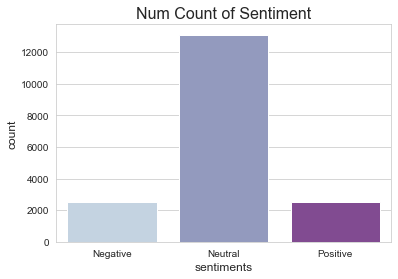

In [22]:
#plotting graph of sentiment and corresponding count
sns.set_style('whitegrid')
sns.barplot(x= 'sentiment', y = 'count', data = df_sen, palette = 'BuPu')
plt.xlabel('sentiments', size = 12)
plt.ylabel('count', size = 12)
plt.title('Num Count of Sentiment', size = 16)
plt.show

In [23]:
#instantiating tokenizer and lemmatizer
tokenizer = RegexpTokenizer(r'\w+')
lemmartizer = WordNetLemmatizer()

In [24]:
#defining functions to preprocess text
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
def word_lemmatizer(text):
    lem_text =' '.join([lemmartizer.lemmatize(i) for i in text])
    return lem_text

In [25]:
from nltk.corpus import stopwords

In [26]:
#applying function to remove punctuation
df['Headlines'] = df['Headlines'].apply(lambda x: remove_punctuation(x))
df['Headlines'].head()

0    Buhari receives Sambo hails Niger Republic’s p...
1    Over 50 countries launch Covid19 vaccination c...
2                    ExMan Utd boss Docherty dies a 92
3      SanwoOlu signs 2021 appropriation bill into law
4              Kaduna demolishes ‘nude party’ building
Name: Headlines, dtype: object

In [27]:
#applying function to tokenize and lower text
df['Headlines'] = df['Headlines'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Headlines'].head()

0    [buhari, receives, sambo, hails, niger, republ...
1    [over, 50, countries, launch, covid19, vaccina...
2            [exman, utd, boss, docherty, dies, a, 92]
3    [sanwoolu, signs, 2021, appropriation, bill, i...
4          [kaduna, demolishes, nude, party, building]
Name: Headlines, dtype: object

In [28]:
df['Headlines'] = df['Headlines'].apply(lambda x: remove_stopwords(x))#removing stopwords
df['Headlines'].head()

0    [buhari, receives, sambo, hails, niger, republ...
1    [50, countries, launch, covid19, vaccination, ...
2               [exman, utd, boss, docherty, dies, 92]
3    [sanwoolu, signs, 2021, appropriation, bill, law]
4          [kaduna, demolishes, nude, party, building]
Name: Headlines, dtype: object

In [29]:
df['Headlines'] = df['Headlines'].apply(lambda x: word_lemmatizer(x))#applying lemmatizer function
df['Headlines'].head()

0    buhari receives sambo hail niger republic peac...
1       50 country launch covid19 vaccination campaign
2                         exman utd bos docherty dy 92
3            sanwoolu sign 2021 appropriation bill law
4                kaduna demolishes nude party building
Name: Headlines, dtype: object

In [30]:
cnt = Counter()#counting words in headlines column
for text in df['Headlines'].values:
    for word in text.split():
        cnt[word] +=1
cnt.most_common(15)#most common words and corresponding count

[('covid19', 1817),
 ('buhari', 1065),
 ('say', 1051),
 ('fg', 1042),
 ('coronavirus', 986),
 ('lagos', 913),
 ('court', 726),
 ('police', 720),
 ('nigeria', 627),
 ('others', 607),
 ('u', 605),
 ('case', 588),
 ('nigerian', 520),
 ('tell', 512),
 ('new', 448)]

In [31]:
#creating new dataframes from sentiment column
df_negative = df[df['Sentiment']=='Negative']
df_positive = df[df['Sentiment']=='Positive']
df_neutral = df[df['Sentiment']=='Neutral']

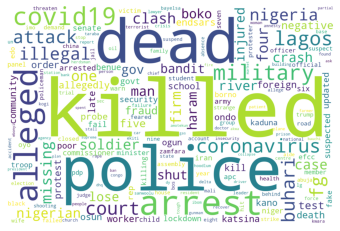

In [32]:
#creating wordcloud for headlines in negative dataframe
text = " ".join([word for word in df_negative['Headlines']])
stopwords = set(STOPWORDS)
stopwords.update(['say', 's', 'says', 'u', 'others', 'new', 'tell', 'two', 'three', 'seek'])
wordcloud = WordCloud(stopwords = stopwords, width=1500, height=1000, background_color='white', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

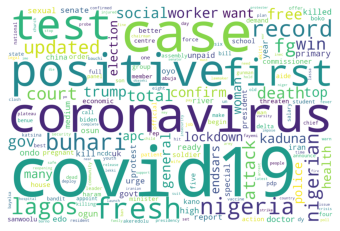

In [33]:
#creating wordcloud for headlines in positive dataframe
text = " ".join([word for word in df_positive['Headlines']])
stopwords = set(STOPWORDS)
stopwords.update(['say', 's', 'says', 'u', 'others', 'new', 'tell', 'two', 'three', 'seek'])
wordcloud = WordCloud(stopwords = stopwords, width=1500, height=1000, background_color='white', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

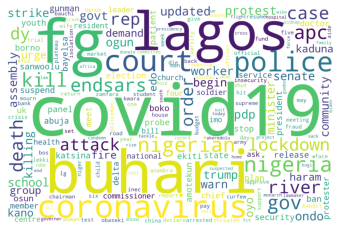

In [34]:
#creating wordcloud for headlines in neutral dataframe
text = " ".join([word for word in df_neutral['Headlines']])
stopwords = set(STOPWORDS)
stopwords.update(['say', 's', 'says', 'u', 'others', 'new', 'tell', 'two', 'three', 'seek'])
wordcloud = WordCloud(stopwords = stopwords, width=1500, height=1000, background_color='white', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
covid_list = ['covid19', 'buhari']#creating list to pull sentences containing words

In [36]:
#getting some sentences with words in covid list
df_positive['Headlines'].apply(lambda text: [sent for sent in sent_tokenize(text) if any(True for w in word_tokenize(sent)
                                                                                        if w.lower() in covid_list)])

0        [buhari receives sambo hail niger republic pea...
9                  [buhari make new year broadcast friday]
10       [china make covid19 vaccine free citizen offic...
19                                                      []
28                                                      []
                               ...                        
18128                                                   []
18129                                                   []
18132                                                   []
18133                                                   []
18137                                                   []
Name: Headlines, Length: 2511, dtype: object

In [37]:
#making list of all states
states = ['abia', 'adamawa', 'akwa ibom', 'anambra', 'bauchi', 'bayelsa', 'benue', 'borno', 'cross river', 'delta', 'ebonyi',
         'edo', 'ekiti', 'enugu', 'gombe', 'imo', 'jigawa', 'kaduna', 'kano', 'katsina', 'kebbi', 'kogi', 'kwara', 'lagos',
         'nasarawa', 'niger', 'osun', 'ogun', 'ondo', 'oyo', 'plateau', 'rivers', 'sokoto', 'taraba', 'yobe', 'zamfara', 'abuja']

In [38]:
#counting states appearance in headlines
cnt = Counter()
for text in df['Headlines'].values:
    for word in text.split():
        if word not in states:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
States = cnt
States

Counter({'niger': 161,
         'kaduna': 258,
         'imo': 161,
         'lagos': 913,
         'kwara': 137,
         'delta': 180,
         'borno': 198,
         'ogun': 291,
         'jigawa': 18,
         'ekiti': 185,
         'kogi': 110,
         'oyo': 248,
         'edo': 240,
         'gombe': 104,
         'kano': 251,
         'katsina': 205,
         'ondo': 307,
         'abuja': 213,
         'ebonyi': 99,
         'osun': 237,
         'plateau': 126,
         'enugu': 94,
         'anambra': 120,
         'kebbi': 14,
         'benue': 153,
         'bauchi': 126,
         'bayelsa': 183,
         'nasarawa': 84,
         'taraba': 66,
         'adamawa': 62,
         'zamfara': 133,
         'yobe': 32,
         'abia': 58,
         'sokoto': 55})

In [39]:
#getting dataframe from counter dict
df_states = pd.DataFrame.from_dict(States, orient='index').reset_index()
df_states = df_states.rename(columns={'index':'States', 0:'Count'})
df_states.head()

,States,Count
0,niger,161
1,kaduna,258
2,imo,161
3,lagos,913
4,kwara,137


In [40]:
#capitalizing first letter of states
df_states['States'] = df_states['States'].apply(lambda x: x.capitalize())
df_states.head()

,States,Count
0,Niger,161
1,Kaduna,258
2,Imo,161
3,Lagos,913
4,Kwara,137


In [41]:
nigeria_geo = r'nigeria.geojson' # geojson file

# creating a plain world map
nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start=6, tiles='stamenwatercolor')

In [42]:
nigeria_map.choropleth(
    geo_data=nigeria_geo,
    data=df_states,
    columns=['States', 'Count'],
    key_on='feature.properties.admin1Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Count of state mentions'
)

# display map
nigeria_map

In [43]:
#list of all the countries in the world
countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
             'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 
             'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
             'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 
             'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire', 
             'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 
             'Equatorial Guinea', 'Eritrea', 'Estonia', 'Swaziland', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia','Germany', 
             'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 
             'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan','Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 
             'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
             'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico','Micronesia', 
             'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar' , 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 
             'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 
             'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 
             'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 
             'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 
             'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 
             'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 
             'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'UK', 'Usa' , 'Uruguay', 
             'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [44]:
#capitalizing first letters 
countries = list(map(lambda x: x.lower(), countries))

In [45]:
#counting occurrences of countries in headlines column
cnt = Counter()
for text in df['Headlines'].values:
    for word in text.split():
        if word not in countries:
            continue
        if word in cnt:
            cnt[word] +=1
        else:
            cnt[word] = 1
Countries = cnt

In [46]:
#creating dataframe with counter dict
df_countries = pd.DataFrame.from_dict(Countries, orient='index').reset_index()
df_countries = df_countries.rename(columns={'index':'Countries', 0:'Count'})
df_countries.head()

,Countries,Count
0,niger,161
1,ireland,4
2,nigeria,627
3,china,168
4,uk,183


In [47]:
df_countries['Countries'] = df_countries['Countries'].apply(lambda x: x.capitalize())
df_countries.head()

,Countries,Count
0,Niger,161
1,Ireland,4
2,Nigeria,627
3,China,168
4,Uk,183


In [48]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='stamenwatercolor')

In [49]:
world_map.choropleth(
    geo_data=world_geo,
    data=df_countries,
    columns=['Countries', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Count of countries mentions'
)

# display map
world_map